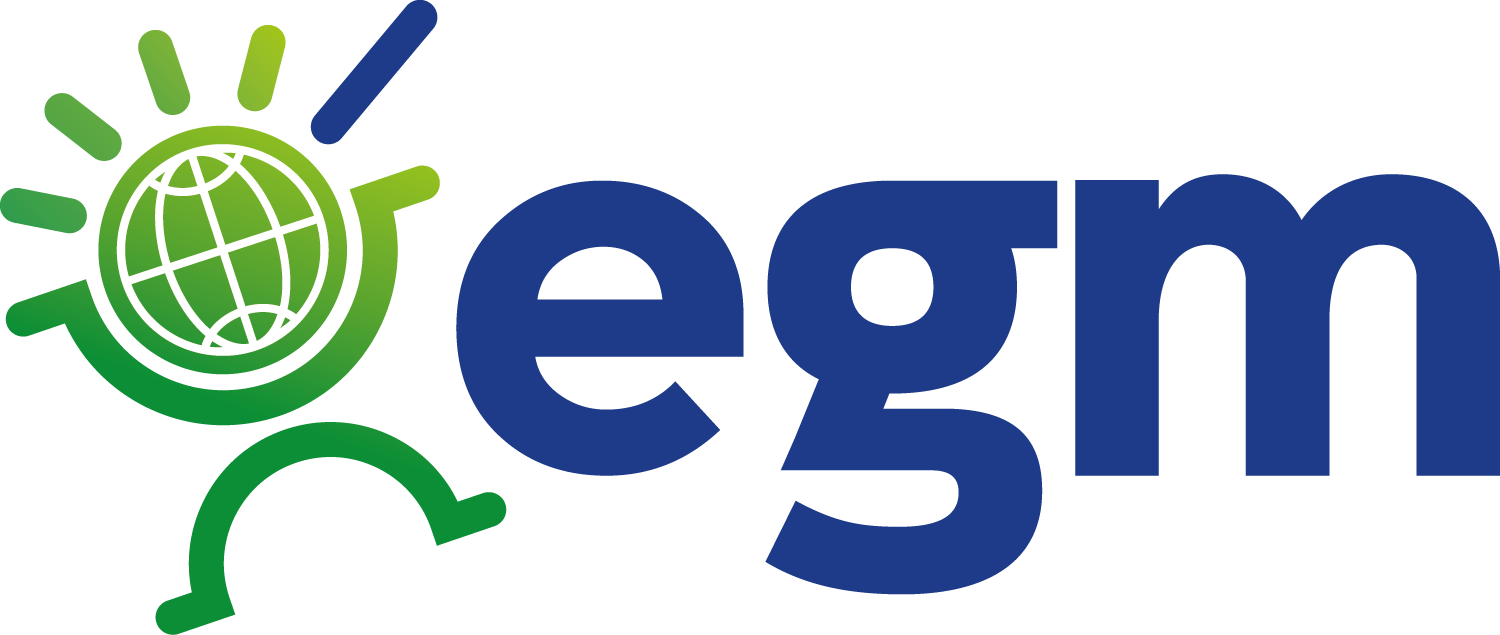

<p style="font-size:30px; color:blue; text-align:center; font-weight: bold">Fiware webinar: MLaaS</p>

This notebook contains all the requests needed to simulate the complete flow of the **MLaaS Fiware webinar**, i.e. simulating both the **Consumer App** and **ML model**.

As a reminder, the complete flow of the interactions between each components is shown below.

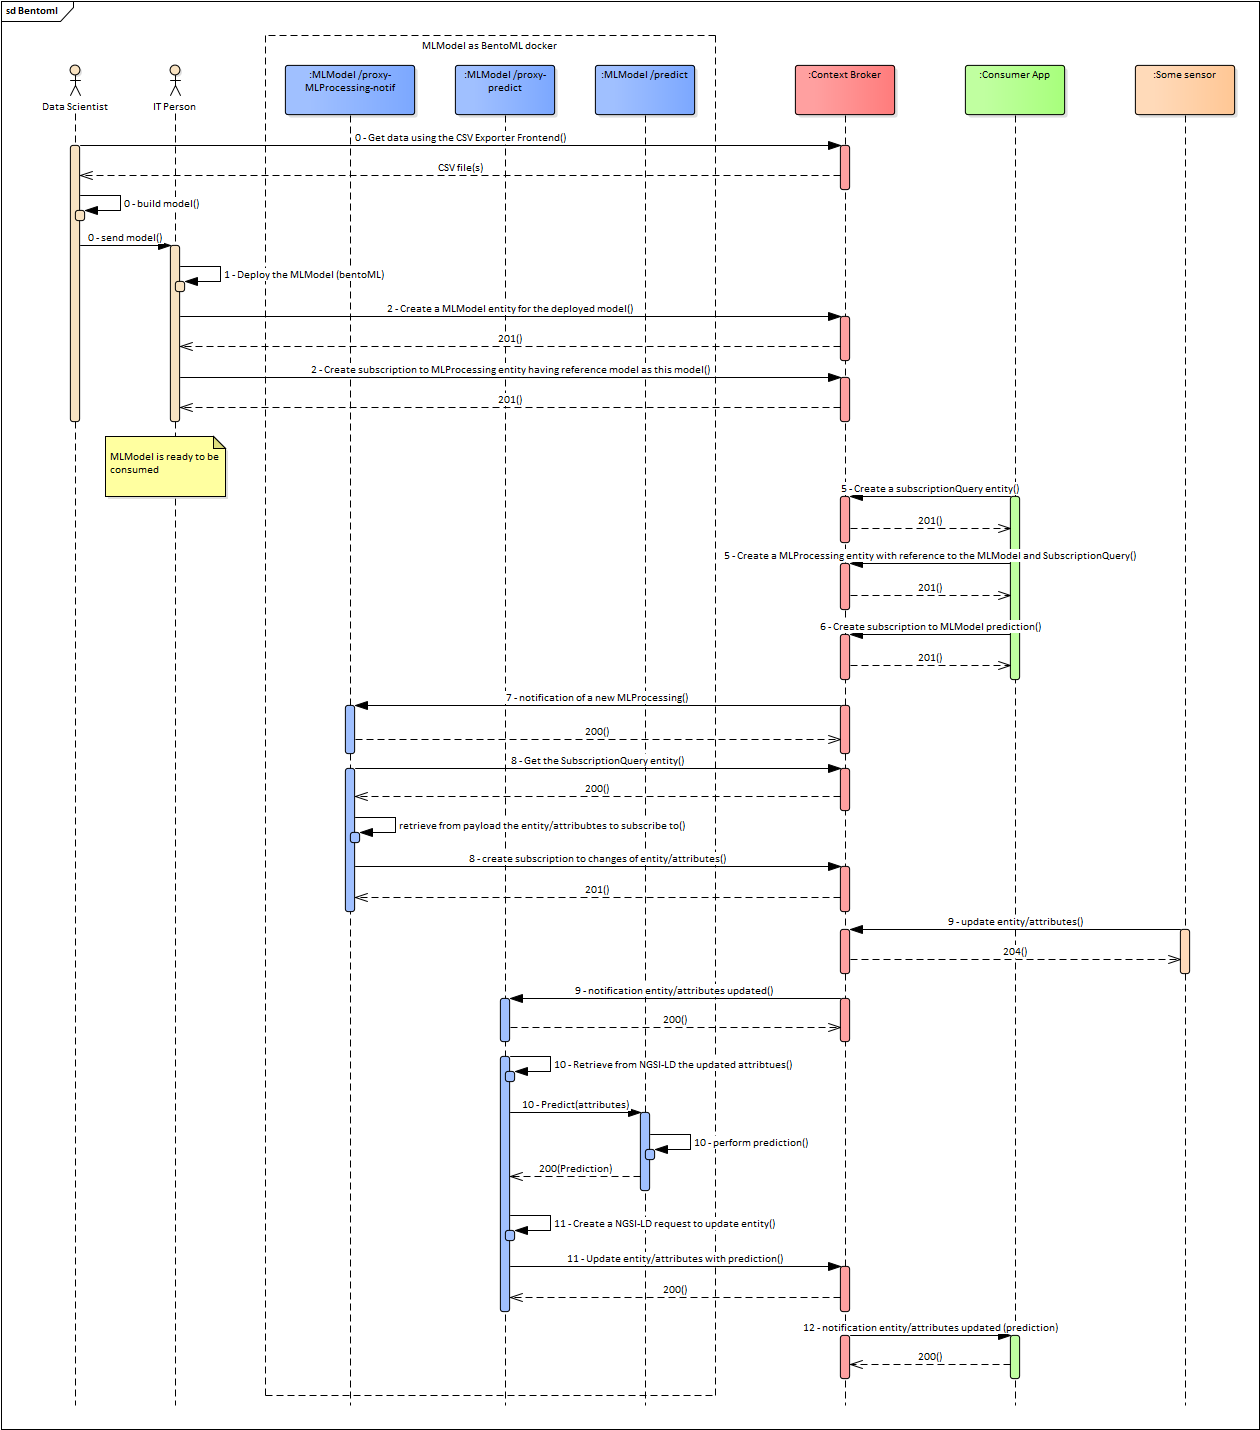

### Some imports and configuration

In [1]:
import requests
import json
import pickle
from datetime import datetime
import pytz

In [2]:
import numpy as np

In [3]:
from uuid import uuid4

In [4]:
# oauth token
with open('./stellio-dev-access.token', 'rb') as f:
    my_access_token = pickle.load(f)

# headers
headers = {
    'Authorization': 'Bearer ' + my_access_token,
    'Content-Type': 'application/ld+json'
}

# @CONTEXT
AT_CONTEXT = [
        'https://raw.githubusercontent.com/easy-global-market/ngsild-api-data-models/master/mlaas/jsonld-contexts/mlaas-precipitation-contexts.jsonld'
]

# URLs
# Replace https://stellio-dev.eglobalmark.com with the url of your Context Broker
URL_ENTITIES = 'https://stellio-dev.eglobalmark.com/ngsi-ld/v1/entities/'
URL_SUBSCRIPTION = 'https://stellio-dev.eglobalmark.com/ngsi-ld/v1/subscriptions/'

# Entity UUID
RIVER_SIAGNE_UUID = 'urn:ngsi-ld:River:014f5730-72ab-4554-a106-afbe5d4d9d26'
MLMODEL_UUID = 'urn:ngsi-ld:MLModel:flow:predict'

# Timezone
timezone_France = pytz.timezone('Europe/Paris')

___

## Some GETs

### River Entity

In [12]:
r = requests.get(URL_ENTITIES+RIVER_SIAGNE_UUID, headers=headers)

In [13]:
r.status_code

200

In [14]:
r.json()

{'id': 'urn:ngsi-ld:River:014f5730-72ab-4554-a106-afbe5d4d9d26',
 'type': 'https://uri.fiware.org/ns/data-models#River',
 'https://smart-data-models.github.io/data-models/terms.jsonld#/definitions/flow': {'type': 'Property',
  'value': 67.24,
  'observedAt': '2021-05-11T15:30:51.000Z',
  'unitCode': 'MQS',
  'https://uri.fiware.org/ns/data-models#computedBy': {'type': 'Relationship',
   'object': 'urn:ngsi-ld:MLModel:flow:predict'}},
 'https://smart-data-models.github.io/data-models/terms.jsonld#/definitions/precipitation': {'type': 'Property',
  'value': 45.5,
  'observedAt': '2021-05-11T15:30:51.000Z',
  'unitCode': 'MMT'},
 'description': {'type': 'Property', 'value': 'River Siagne'},
 '@context': ['https://uri.etsi.org/ngsi-ld/v1/ngsi-ld-core-context.jsonld']}

### River Entity, attribute: precipitation

In [101]:
# query from SubscriptionQuery entity
query = '?attrs=flow'

In [102]:
r = requests.get(URL_ENTITIES+'urn:ngsi-ld:River:014f5730-72ab-4554-a106-afbe5d4d9d26'+query, headers=headers_get)

In [103]:
r.json()

{'id': 'urn:ngsi-ld:River:014f5730-72ab-4554-a106-afbe5d4d9d26',
 'type': 'River',
 'flow': {'type': 'Property',
  'value': 55,
  'observedAt': '2021-05-11T14:37:50.000Z',
  'unitCode': 'MQS'},
 '@context': ['https://raw.githubusercontent.com/easy-global-market/ngsild-api-data-models/master/mlaas/jsonld-contexts/mlaas-precipitation-contexts.jsonld']}

### MLModel Entity

In [15]:
r = requests.get(URL_ENTITIES+'urn:ngsi-ld:MLModel:flow:predict', headers=headers)

In [16]:
r.status_code

200

In [17]:
r.json()

{'id': 'urn:ngsi-ld:MLModel:flow:predict',
 'type': 'https://uri.fiware.org/ns/data-models#MLModel',
 'https://smart-data-models.github.io/data-models/terms.jsonld#/definitions/version': {'type': 'Property',
  'value': 0.1},
 'description': {'type': 'Property',
  'value': 'Prediction of the Siagne flow from rain precipitation'},
 'name': {'type': 'Property', 'value': 'Flow Predict Siagne'},
 'https://uri.fiware.org/ns/data-models#algorithm': {'type': 'Property',
  'value': 'Linear Regression'},
 'https://uri.fiware.org/ns/data-models#inputAttributes': {'type': 'Property',
  'value': 'precipitation'},
 'https://uri.fiware.org/ns/data-models#outputAttributes': {'type': 'Property',
  'value': 'flow'},
 '@context': ['https://uri.etsi.org/ngsi-ld/v1/ngsi-ld-core-context.jsonld']}

### MLProcesing Subscription 

In [18]:
r = requests.get(URL_SUBSCRIPTION+'urn:ngsi-ld:Subscription:MLModel:flow:predict:71dba318-2989-4c76-a22c-52a53f04759b',
                 headers=headers)

In [19]:
r.status_code

200

In [20]:
r.json()

{'id': 'urn:ngsi-ld:Subscription:MLModel:flow:predict:71dba318-2989-4c76-a22c-52a53f04759b',
 'type': 'Subscription',
 'entities': [{'type': 'https://uri.fiware.org/ns/data-models#MLProcessing'}],
 'q': 'refMLModel=="urn:ngsi-ld:MLModel:flow:predict"',
 'notification': {'attributes': ['https://uri.fiware.org/ns/data-models#refSubscriptionQuery'],
  'format': 'normalized',
  'endpoint': {'uri': 'http://10.5.1.217:5000/ngsi-ld/ml/processing',
   'accept': 'application/json'},
  'status': 'ok',
  'timesSent': 1,
  'lastNotification': '2021-05-11T15:29:07.95374Z',
  'lastSuccess': '2021-05-11T15:29:07.95374Z'},
 'isActive': True,
 '@context': ['https://uri.etsi.org/ngsi-ld/v1/ngsi-ld-core-context.jsonld']}

### SubscriptionQuery Entity

In [21]:
r = requests.get(URL_ENTITIES+'urn:ngsi-ld:MLProcessing:SubscriptionQuery:e7be459e-dcee-46ab-90da-fba3120db4ff',
                 headers=headers)

In [22]:
r.status_code

200

In [23]:
r.json()

{'id': 'urn:ngsi-ld:MLProcessing:SubscriptionQuery:e7be459e-dcee-46ab-90da-fba3120db4ff',
 'type': 'https://uri.fiware.org/ns/data-models#SubscriptionQuery',
 'entityID': {'type': 'Property',
  'value': 'urn:ngsi-ld:River:014f5730-72ab-4554-a106-afbe5d4d9d26'},
 'query': {'type': 'Property', 'value': '?attrs=precipitation'},
 '@context': ['https://uri.etsi.org/ngsi-ld/v1/ngsi-ld-core-context.jsonld']}

### MLProcessing Entity

In [24]:
r = requests.get(URL_ENTITIES+'urn:ngsi-ld:MLProcessing:4bbb2b09-ad6c-4fb9-8f40-8d37e4cddd3a',
                 headers=headers)

In [25]:
r.status_code

200

In [26]:
r.json()

{'id': 'urn:ngsi-ld:MLProcessing:4bbb2b09-ad6c-4fb9-8f40-8d37e4cddd3a',
 'type': 'https://uri.fiware.org/ns/data-models#MLProcessing',
 'https://uri.fiware.org/ns/data-models#refMLModel': {'type': 'Relationship',
  'object': 'urn:ngsi-ld:MLModel:flow:predict'},
 'https://uri.fiware.org/ns/data-models#refSubscriptionQuery': {'type': 'Relationship',
  'object': 'urn:ngsi-ld:MLProcessing:SubscriptionQuery:e7be459e-dcee-46ab-90da-fba3120db4ff'},
 '@context': ['https://uri.etsi.org/ngsi-ld/v1/ngsi-ld-core-context.jsonld']}

### MLModel results Subscription 

In [27]:
r = requests.get(URL_SUBSCRIPTION+'urn:ngsi-ld:Subscription:flow:predicted:4debd711-408a-4362-8352-9f885e7ca990',
                 headers=headers)

In [28]:
r.status_code

200

In [29]:
r.json()

{'id': 'urn:ngsi-ld:Subscription:flow:predicted:4debd711-408a-4362-8352-9f885e7ca990',
 'type': 'Subscription',
 'entities': [{'id': 'urn:ngsi-ld:River:014f5730-72ab-4554-a106-afbe5d4d9d26',
   'type': 'https://uri.fiware.org/ns/data-models#River'}],
 'watchedAttributes': ['flow'],
 'notification': {'attributes': ['https://smart-data-models.github.io/data-models/terms.jsonld#/definitions/flow'],
  'format': 'normalized',
  'endpoint': {'uri': 'https://0ba2eb3a-2ff5-4a72-9a6f-f430f9f41ad3.mock.pstmn.io/mlprocessing',
   'accept': 'application/json'},
  'status': 'ok',
  'timesSent': 1,
  'lastNotification': '2021-05-11T15:30:52.475122Z',
  'lastSuccess': '2021-05-11T15:30:52.475122Z'},
 'isActive': True,
 '@context': ['https://uri.etsi.org/ngsi-ld/v1/ngsi-ld-core-context.jsonld']}

### Input Data Subscription

In [30]:
r = requests.get(URL_SUBSCRIPTION+'urn:ngsi-ld:Subscription:input:data:2c30fa86-a25c-4191-8311-8954294e92b3',
                 headers=headers)

In [31]:
r.status_code

200

In [32]:
r.json()

{'id': 'urn:ngsi-ld:Subscription:input:data:2c30fa86-a25c-4191-8311-8954294e92b3',
 'type': 'Subscription',
 'entities': [{'id': 'urn:ngsi-ld:River:014f5730-72ab-4554-a106-afbe5d4d9d26',
   'type': 'https://uri.fiware.org/ns/data-models#River'}],
 'watchedAttributes': ['precipitation'],
 'notification': {'attributes': ['https://smart-data-models.github.io/data-models/terms.jsonld#/definitions/precipitation'],
  'format': 'normalized',
  'endpoint': {'uri': 'http://10.5.1.217:5000/ngsi-ld/ml/predict',
   'accept': 'application/json'},
  'status': 'ok',
  'timesSent': 1,
  'lastNotification': '2021-05-11T15:30:51.849465Z',
  'lastSuccess': '2021-05-11T15:30:51.849465Z'},
 'isActive': True,
 '@context': ['https://uri.etsi.org/ngsi-ld/v1/ngsi-ld-core-context.jsonld']}

___

## Cleanup

### River entity

In [41]:
#r = requests.delete(URL_ENTITIES+'urn:ngsi-ld:River:014f5730-72ab-4554-a106-afbe5d4d9d26', headers=headers)

In [42]:
#r.status_code

204

### MLModel entity

In [81]:
r = requests.delete(URL_ENTITIES+'urn:ngsi-ld:MLModel:flow:predict', headers=headers)

In [82]:
r.status_code

404

### MLProcessig subscription

In [71]:
r = requests.delete(URL_SUBSCRIPTION+'urn:ngsi-ld:Subscription:MLModel:flow:predict:71dba318-2989-4c76-a22c-52a53f04759b',
                    headers=headers)

In [72]:
r.status_code

404

### SubscriptionQuery Entity

In [73]:
r = requests.delete(URL_ENTITIES+'urn:ngsi-ld:MLProcessing:SubscriptionQuery:e7be459e-dcee-46ab-90da-fba3120db4ff',
                 headers=headers)

In [74]:
r.status_code

404

### MLProcessing Entity

In [75]:
r = requests.delete(URL_ENTITIES+'urn:ngsi-ld:MLProcessing:4bbb2b09-ad6c-4fb9-8f40-8d37e4cddd3a',
                 headers=headers)

In [76]:
r.status_code

404

### MLModel results Subscription 

In [77]:
r = requests.delete(URL_SUBSCRIPTION+'urn:ngsi-ld:Subscription:flow:predicted:4debd711-408a-4362-8352-9f885e7ca990',
                 headers=headers)

In [78]:
r.status_code

404

### Input Data Subscription

In [79]:
r = requests.delete(URL_SUBSCRIPTION+'urn:ngsi-ld:Subscription:input:data:2c30fa86-a25c-4191-8311-8954294e92b3',
                 headers=headers)

In [80]:
r.status_code

404

___
# 2 - IT PERSON: Create a MLModel entity
Creation of a MLModel entity into the Context Broker

In [108]:
MLMODEL_UUID = 'urn:ngsi-ld:MLModel:flow:predict'

In [109]:
json_ = {
    '@context': AT_CONTEXT,
    'id': MLMODEL_UUID,
    'type':'MLModel',
    'name': {
        'type': 'Property',
        'value': 'Flow Predict Siagne'
    },
    'description': {
        'type': 'Property',
        'value': 'Prediction of the Siagne flow from rain precipitation'
    },
    'algorithm': {
        'type': 'Property',
        'value': 'Linear Regression'
    },
    'version': {
        'type': 'Property',
        'value': 0.1
    },
    'inputAttributes': {
        'type': 'Property',
        'value': 'precipitation'
    },
    'outputAttributes': {
        'type': 'Property',
        'value': 'flow'
    }
}

In [110]:
json_

{'@context': ['https://raw.githubusercontent.com/easy-global-market/ngsild-api-data-models/master/mlaas/jsonld-contexts/mlaas-precipitation-contexts.jsonld'],
 'id': 'urn:ngsi-ld:MLModel:flow:predict',
 'type': 'MLModel',
 'name': {'type': 'Property', 'value': 'Flow Predict Siagne'},
 'description': {'type': 'Property',
  'value': 'Prediction of the Siagne flow from rain precipitation'},
 'algorithm': {'type': 'Property', 'value': 'Linear Regression'},
 'version': {'type': 'Property', 'value': 0.1},
 'inputAttributes': {'type': 'Property', 'value': 'precipitation'},
 'outputAttributes': {'type': 'Property', 'value': 'flow'}}

In [111]:
r = requests.post(URL_ENTITIES, json=json_, headers=headers)

In [112]:
r.status_code

201

___
# 2 - IT PERSON: Subscription to MLProcessing entities
Subscription to the MLProcessing entities of which the **referenced MLModel** is id: **urn:ngsi-ld:MLModel:flow:predict**

In [122]:
# uuid = str(uuid4())
SUBS_MLPROCESSING_UUID = 'urn:ngsi-ld:Subscription:MLModel:flow:predict:71dba318-2989-4c76-a22c-52a53f04759b'

In [123]:
ENDPOINT_SUBS_MLPROCESSING_NOTIF = 'https://0ba2eb3a-2ff5-4a72-9a6f-f430f9f41ad3.mock.pstmn.io/mlprocessing'

In [124]:
json_ = {
    '@context': AT_CONTEXT,
    'id':SUBS_MLPROCESSING_UUID,
    'type':'Subscription',
    'entities': [
        {
          'type': 'MLProcessing'
        }
    ],
    'q': 'refMLModel=="'+MLMODEL_UUID+'"',
    'notification': {
        'endpoint': {
            'uri': ENDPOINT_SUBS_MLPROCESSING_NOTIF,
            'accept': 'application/json'
        },
        'attributes': ['refSubscriptionQuery']
    }
}

In [125]:
json_

{'@context': ['https://raw.githubusercontent.com/easy-global-market/ngsild-api-data-models/master/mlaas/jsonld-contexts/mlaas-precipitation-contexts.jsonld'],
 'id': 'urn:ngsi-ld:Subscription:MLModel:flow:predict:71dba318-2989-4c76-a22c-52a53f04759b',
 'type': 'Subscription',
 'entities': [{'type': 'MLProcessing'}],
 'q': 'refMLModel=="urn:ngsi-ld:MLModel:flow:predict"',
 'notification': {'endpoint': {'uri': 'https://0ba2eb3a-2ff5-4a72-9a6f-f430f9f41ad3.mock.pstmn.io/mlprocessing',
   'accept': 'application/json'},
  'attributes': ['refSubscriptionQuery']}}

In [126]:
r = requests.post(URL_SUBSCRIPTION, json=json_, headers=headers)

In [127]:
r.status_code

409

___
# 5 - CONSUMER APP: Create a SubscriptionQuery entity
The entity will indicate where the **MLModel** shall take the input data from, by giving the entity id and attribute to query.

In [192]:
# uuid = str(uuid4())
SUBSCRIPTION_QUERY_UUID = 'urn:ngsi-ld:MLProcessing:SubscriptionQuery:e7be459e-dcee-46ab-90da-fba3120db4ff'

In [193]:
json_ = {
    '@context': AT_CONTEXT,
    'id': SUBSCRIPTION_QUERY_UUID,
    'type':'SubscriptionQuery',
    'entityID': {
        'type': 'Property',
        'value': RIVER_SIAGNE_UUID
    },
    'query': {
        'type':'Property',
        'value': '?attrs=precipitation'
    }
}

In [194]:
json_

{'@context': ['https://raw.githubusercontent.com/easy-global-market/ngsild-api-data-models/master/mlaas/jsonld-contexts/mlaas-precipitation-contexts.jsonld'],
 'id': 'urn:ngsi-ld:MLProcessing:SubscriptionQuery:e7be459e-dcee-46ab-90da-fba3120db4ff',
 'type': 'SubscriptionQuery',
 'entityID': {'type': 'Property',
  'value': 'urn:ngsi-ld:River:014f5730-72ab-4554-a106-afbe5d4d9d26'},
 'query': {'type': 'Property', 'value': '?attrs=precipitation'}}

In [195]:
r = requests.post(URL_ENTITIES, json=json_, headers=headers)

In [196]:
r.status_code

201

___
# 5 - CONSUMER APP: Create a MLProcessing entity
The MLProcessing entities of which the referenced MLModel is id **urn:ngsi-ld:MLModel:flow:predict**. The MLProcessing entity contains:
* A reference to the **MLModel** to use,
* A reference to an entity that provides information on how the **MLModel** can query the input data.

In [197]:
# uuid = str(uuid4())
MLPROCESSING_UUID = 'urn:ngsi-ld:MLProcessing:4bbb2b09-ad6c-4fb9-8f40-8d37e4cddd3a'

In [198]:
json_ = {
    '@context': AT_CONTEXT,
    'id': MLPROCESSING_UUID,
    'type':'MLProcessing',
    'refMLModel': {
        'type': 'Relationship',
        'object': MLMODEL_UUID
    },
    'refSubscriptionQuery': {
        'type': 'Relationship',
        'object': SUBSCRIPTION_QUERY_UUID
    }
}

In [199]:
json_

{'@context': ['https://raw.githubusercontent.com/easy-global-market/ngsild-api-data-models/master/mlaas/jsonld-contexts/mlaas-precipitation-contexts.jsonld'],
 'id': 'urn:ngsi-ld:MLProcessing:4bbb2b09-ad6c-4fb9-8f40-8d37e4cddd3a',
 'type': 'MLProcessing',
 'refMLModel': {'type': 'Relationship',
  'object': 'urn:ngsi-ld:MLModel:flow:predict'},
 'refSubscriptionQuery': {'type': 'Relationship',
  'object': 'urn:ngsi-ld:MLProcessing:SubscriptionQuery:e7be459e-dcee-46ab-90da-fba3120db4ff'}}

In [200]:
r = requests.post(URL_ENTITIES, json=json_, headers=headers)

In [201]:
r.status_code

201

___
# 6 - CONSUMER APP: Subscription to the MLModel prediction
Subscription to the output data that will be updated by the MLModel.

In [202]:
#uuid = str(uuid4())
SUBSCRIPTION_MLMODEL_PREDS = 'urn:ngsi-ld:Subscription:flow:predicted:4debd711-408a-4362-8352-9f885e7ca990'

In [203]:
ENDPOINT_RESULTS_NOTIF_TO_APP = 'https://0ba2eb3a-2ff5-4a72-9a6f-f430f9f41ad3.mock.pstmn.io/mlprocessing'

In [204]:
json_ = {
    '@context': AT_CONTEXT,
    'id':SUBSCRIPTION_MLMODEL_PREDS,
    'type':'Subscription',
    'entities': [
        {
            'id': RIVER_SIAGNE_UUID,
            'type': 'River'
        }
    ],
    'watchedAttributes': ['flow'],
    'notification': {
        'endpoint': {
            'uri': ENDPOINT_RESULTS_NOTIF_TO_APP,
            'accept': 'application/json'
        },
        'attributes': ['flow']
    }
}

In [205]:
json_

{'@context': ['https://raw.githubusercontent.com/easy-global-market/ngsild-api-data-models/master/mlaas/jsonld-contexts/mlaas-precipitation-contexts.jsonld'],
 'id': 'urn:ngsi-ld:Subscription:flow:predicted:4debd711-408a-4362-8352-9f885e7ca990',
 'type': 'Subscription',
 'entities': [{'id': 'urn:ngsi-ld:River:014f5730-72ab-4554-a106-afbe5d4d9d26',
   'type': 'River'}],
 'watchedAttributes': ['flow'],
 'notification': {'endpoint': {'uri': 'https://0ba2eb3a-2ff5-4a72-9a6f-f430f9f41ad3.mock.pstmn.io/mlprocessing',
   'accept': 'application/json'},
  'attributes': ['flow']}}

In [206]:
r = requests.post(URL_SUBSCRIPTION, json=json_, headers=headers)

In [207]:
r.status_code

201

___
# 7 - CONTEXT BROKER: Notification of a new MLProcessing
On receipt of the **"New MLProcessing"** notification from the context broker, the MLModel retrieve from the notification the **reference to the SubscriptionQuery**.

An example of the notification of a new MLProcessing is shown below:


```python
{
    'id': 'urn:ngsi-ld:Notification:fadc5090-2425-42f8-b318-1966fa0e0011',
    'type': 'Notification',
    'subscriptionId': 'urn:ngsi-ld:Subscription:MLModel:flow:predict:71dba318-2989-4c76-a22c-52a53f04759b',
    'notifiedAt': '2021-05-03T09:53:50.330686Z',
    'data': [
        {
            'id': 'urn:ngsi-ld:MLProcessing:4bbb2b09-ad6c-4fb9-8f40-8d37e4cddd3a',
            'type': 'MLProcessing',
            'refSubscriptionQuery':
                {
                    'type': 'Relationship',
                    'object': 'urn:ngsi-ld:MLProcessing:SubscriptionQuery:e7be459e-dcee-46ab-90da-fba3120db4ff'
                },
            '@context': [
                'https://raw.githubusercontent.com/easy-global-market/ngsild-api-data-models/master/mlaas/jsonld-contexts/mlaas-compound.jsonl'
            ]
        }
    ]
}
```

**Retrieving the reference to the SubscriptionQuery Entity**

In [52]:
mlprocessing_notification = {
    'id': 'urn:ngsi-ld:Notification:fadc5090-2425-42f8-b318-1966fa0e0011',
    'type': 'Notification',
    'subscriptionId': 'urn:ngsi-ld:Subscription:MLModel:flow:predict:71dba318-2989-4c76-a22c-52a53f04759b',
    'notifiedAt': '2021-05-03T09:53:50.330686Z',
    'data': [
        {
            'id': 'urn:ngsi-ld:MLProcessing:4bbb2b09-ad6c-4fb9-8f40-8d37e4cddd3a',
            'type': 'MLProcessing',
            'refSubscriptionQuery':
                {
                    'type': 'Relationship',
                    'object': 'urn:ngsi-ld:MLProcessing:SubscriptionQuery:e7be459e-dcee-46ab-90da-fba3120db4ff'
                },
            '@context': [
                'https://raw.githubusercontent.com/easy-global-market/ngsild-api-data-models/master/mlaas/jsonld-contexts/mlaas-compound.jsonl'
            ]
        }
    ]
}

In [400]:
subscription_query_id = mlprocessing_notification['data'][0]['refSubscriptionQuery']['object']

NameError: name 'mlprocessing_notification' is not defined

___
# 8 - MLModel: GET the SubscriptionQuery entity
Get the SubscriptionQuery entity and extract the **query** to get the input data

In [398]:
r = requests.get(URL_ENTITIES+subscription_query_id,
                 headers=headers)

NameError: name 'subscription_query_id' is not defined

In [399]:
r.status_code

201

In [ ]:
SUBSCRIPTION_QUERY_ENTITY = r.json()

In [130]:
SUBSCRIPTION_QUERY_ENTITY

___
# 8 - MLModel: Subscription of change of input data
Create a subscription to in order to be informed when new input data are available (i.e. trigger a new prediction).

In theory, we should be able to get all information from the query. Here, we can at least get the id of the Siagne Entity

In [132]:
ENTITY_INPUT_DATA = SUBSCRIPTION_QUERY_ENTITY['entityID']['value']

In [57]:
#uuid = str(uuid4())
SUBSCRIPTION_INPUT_DATA = 'urn:ngsi-ld:Subscription:input:data:2c30fa86-a25c-4191-8311-8954294e92b3'

In [58]:
ENDPOINT_INPUT_DATA_CHANGED = 'https://0ba2eb3a-2ff5-4a72-9a6f-f430f9f41ad3.mock.pstmn.io/mlprocessing'

In [59]:
json_ = {
    '@context': AT_CONTEXT,
    'id':SUBSCRIPTION_INPUT_DATA,
    'type':'Subscription',
    'entities': [
        {
            'id': ENTITY_INPUT_DATA,
            'type': 'River'
        }
    ],
    'watchedAttributes': ['precipitation'],
    'notification': {
        'endpoint': {
            'uri': ENDPOINT_INPUT_DATA_CHANGED,
            'accept': 'application/json'
        },
        'attributes': ['precipitation']
    }
}

In [60]:
json_

{'@context': ['https://raw.githubusercontent.com/easy-global-market/ngsild-api-data-models/master/mlaas/jsonld-contexts/mlaas-precipitation.jsonld'],
 'id': 'urn:ngsi-ld:Subscription:input:data:2c30fa86-a25c-4191-8311-8954294e92b3',
 'type': 'Subscription',
 'entities': [{'id': 'urn:ngsi-ld:River:014f5730-72ab-4554-a106-afbe5d4d9d26',
   'type': 'River'}],
 'watchedAttributes': ['precipitation'],
 'notification': {'endpoint': {'uri': 'https://0ba2eb3a-2ff5-4a72-9a6f-f430f9f41ad3.mock.pstmn.io/mlprocessing',
   'accept': 'application/json'},
  'attributes': ['precipitation']}}

In [61]:
r = requests.post(URL_SUBSCRIPTION, json=json_, headers=headers)

In [62]:
r.status_code

201

___
# 9 - SENSOR: Update precipitation
Some sensor updates the precipitation value of the Siagne Entity.

In [57]:
observedAt = timezone_France.localize(datetime.now().replace(microsecond=0)).isoformat()
precipitation = 20.5

In [58]:
json_ = {
    '@context': AT_CONTEXT,
    'precipitation': [
        {
            'type': 'Property',
            'value': precipitation,
            'unitCode': 'MMT',
            'observedAt': observedAt
        }
    ]
}

In [59]:
json_

{'@context': ['https://raw.githubusercontent.com/easy-global-market/ngsild-api-data-models/master/mlaas/jsonld-contexts/mlaas-precipitation-contexts.jsonld'],
 'precipitation': [{'type': 'Property',
   'value': 20.5,
   'unitCode': 'MMT',
   'observedAt': '2021-05-05T15:01:53+02:00'}]}

In [60]:
URL_PATCH_PRECIPITATION = URL_ENTITIES+RIVER_SIAGNE_UUID+'/attrs'

In [61]:
r = requests.post(URL_PATCH_PRECIPITATION, json=json_, headers=headers)

In [62]:
r.status_code

204

___
# 9 - MLMODEL: Retrieve input data from notification
Notificaiton of the update of the precipitation value has been received. The MLModel will extract this value from the notification and perform a prediction on that value.

An example of this notification is shown below:
```python
{
    'id': 'urn:ngsi-ld:Notification:cc231a15-d220-403c-bfc6-ad60bc49466f',
    'type': 'Notification',
    'subscriptionId': 'urn:ngsi-ld:Subscription:input:data:2c30fa86-a25c-4191-8311-8954294e92b3',
    'notifiedAt': '2021-05-04T06:45:32.83178Z',
    'data': [
        {
            'id': 'urn:ngsi-ld:River:014f5730-72ab-4554-a106-afbe5d4d9d26',
            'type': 'River',
            'precipitation': {
                'type': 'Property',
                'createdAt': '2021-05-04T06:45:32.674520Z',
                'value': 2.2,
                'observedAt': '2021-05-04T06:35:22.000Z',
                'unitCode': 'MMT'
            },
            '@context': [
                'https://raw.githubusercontent.com/easy-global-market/ngsild-api-data-models/master/mlaas/jsonld-contexts/mlaas-precipitation-compound.jsonld'
            ]
        }
    ]
}

```

In [75]:
input_data_notification = {
    'id': 'urn:ngsi-ld:Notification:cc231a15-d220-403c-bfc6-ad60bc49466f',
    'type': 'Notification',
    'subscriptionId': 'urn:ngsi-ld:Subscription:input:data:2c30fa86-a25c-4191-8311-8954294e92b3',
    'notifiedAt': '2021-05-04T06:45:32.83178Z',
    'data': [
        {
            'id': 'urn:ngsi-ld:River:014f5730-72ab-4554-a106-afbe5d4d9d26',
            'type': 'River',
            'precipitation': {
                'type': 'Property',
                'createdAt': '2021-05-04T06:45:32.674520Z',
                'value': 4.5,
                'observedAt': '2021-05-04T06:35:22.000Z',
                'unitCode': 'MMT'
            },
            '@context': [
                'https://raw.githubusercontent.com/easy-global-market/ngsild-api-data-models/master/mlaas/jsonld-contexts/mlaas-precipitation-compound.jsonld'
            ]
        }
    ]
}

In [76]:
input_data = input_data_notification['data'][0]['precipitation']['value']

___
# 10 - MLMODEL: Perform prediction
MLModel is performing prediction of the Siagne **flow** based on the new value of the **precipitation**:
* Loading the model first,
* reshaping our input data (expecting value is a two DIMs array)
* Making the prediction

In [77]:
with open('./linear_model.pickle', 'rb') as f:
    model = pickle.load(f)

In [78]:
input_data = np.array([input_data]).reshape(-1,1)

In [79]:
flow_prediction = round(float(model.predict(input_data).squeeze()), 2)

In [80]:
print(f'Flow predicted: {flow_prediction}')

Flow predicted: 14.13


___
# 11 - MLMODEL: Update Siagne entity
MLModel is udpdating the **flow** property of the **Siagne entity** with the predicted value.

In [81]:
predictedAt = timezone_France.localize(datetime.now().replace(microsecond=0)).isoformat()

In [82]:
json_ = {
    '@context': AT_CONTEXT,
    'flow': [
        {
            'type': 'Property',
            'value': flow_prediction,
            'unitCode': 'MQS',
            'observedAt': predictedAt,
            'conputedBy': {
                'type': 'Relationship',
                'object': MLMODEL_UUID
            }
        }
    ]
}

In [83]:
json_

{'@context': ['https://raw.githubusercontent.com/easy-global-market/ngsild-api-data-models/master/mlaas/jsonld-contexts/mlaas-precipitation.jsonld'],
 'flow': [{'type': 'Property',
   'value': 14.13,
   'unitCode': 'MQS',
   'observedAt': '2021-05-04T10:32:36+02:00',
   'conputedBy': {'type': 'Relationship',
    'object': 'urn:ngsi-ld:MLModel:flow:predict'}}]}

In [84]:
URL_PATCH_FLOW = URL_ENTITIES+RIVER_SIAGNE_UUID+'/attrs'

In [85]:
r = requests.post(URL_PATCH_FLOW, json=json_, headers=headers)

In [86]:
r.status_code

204